# Demo – Performing Chi-Square Tests


In this demo, you will be shown how to perform Chi-square tests.

# Scenario

We have a data of students in a university. Administrator of this university wants to test some assumptions regarding the college. So the administrator uses the statistical tests to check those assumptions.
    
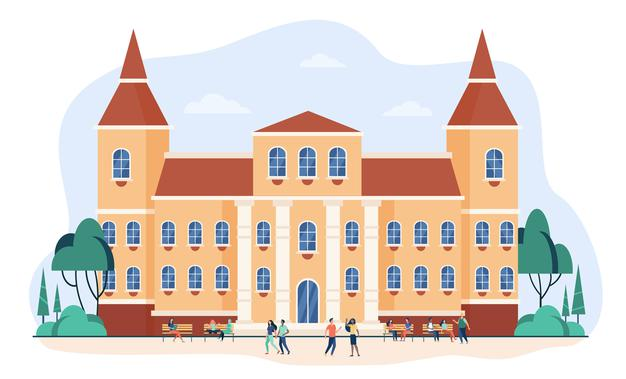


The data set has following columns:
    1. stud.id
    2. name
    3. gender
    4. age
    5. height
    6. weight
    7. religion
    8. nc.score
    9. semester
    10. major
    11. minor
    12. score1
    13. score2
    14. online.tutorial
    15. graduated
    16. salary
<br>
<br>

# Topics covered:
      - Chi-square Tests

# Objectives
In this demo we will,
- Draw conclusions about the data
- Apply types of Chi–square Test to know the relation between categorical variables

In [1]:
# importing packages

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Reading a csv file

data = pd.read_csv('students.csv')
data.head()

,stud.id,name,gender,age,height,weight,religion,nc.score,semester,major,minor,score1,score2,online.tutorial,graduated,salary
1,833917,"Gonzales, Christina",Female,19,160,64.8,Muslim,1.91,1st,Political Science,Social Sciences,NaN,NaN,0,0,NaN
2,898539,"Lozano, T'Hani",Female,19,172,73.0,Other,1.56,2nd,Social Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
3,379678,"Williams, Hanh",Female,22,168,70.6,Protestant,1.24,3rd,Social Sciences,Mathematics and Statistics,45.0,46.0,0,0,NaN
4,807564,"Nem, Denzel",Male,19,183,79.7,Other,1.37,2nd,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
5,383291,"Powell, Heather",Female,21,175,71.4,Catholic,1.46,1st,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN


In [3]:
data = data.dropna()

## Chi-Square Test for Goodness of Fit
### Q. Find whether there is equal proportion of males and females in university?
The hypothesis testing is done in 5 steps
    1. Determine the hypothesis statements
    2. Collecting data
    3. Determine the significance level
    4. Statistical test
    5. Interpret the result
    
<b>1. Determine the hypothesis statement</b><br>
<b>Null Hypothesis (H0):</b> Proportion of male and female is same<br>
<b>Alternative Hypothesis (H1):</b> Proportion of male and female is not same

<b>2. Collecting data</b><br>
A sample data of scores of 500 students is collected to test the hypothesis.<br> 

In [21]:
data_table = pd.crosstab(data.gender.sample(500,random_state=1),data.gender.sample(500,random_state=1))
data_table

gender,Female,Male
gender,,
Female,193,0
Male,0,307


We have obtained the data required for the hypothesis test
<br><br><br>
<b>3. Determine Significance Level</b><br>
Let us consider a significance level of 0.05, it means we are 95% confident about the hypothesis test

In [22]:
# determining significance level

alpha = 0.05

<b>4. Statitical Test</b><br>
We can perform the Chi-Square Test for Goodness of Fit

Find the critical point using Percent Point Function(PPF) or by using chi2-table <br>
We need significance level and degrees of freedom to find the critical value<br>

alpha = 0.05<br>
DOF = (number of categories-1) = 1

In [23]:
from scipy.stats import chi2

# Defining the probability
p = 1 - alpha/2

# Degrees of freedom
df = 1

critical_value = chi2.ppf(p,df)
print("The critical value of 95% confidence level and with 1 degrees of freedom:",critical_value)

The critical value of 95% confidence level and with 1 degrees of freedom: 5.023886187314888


In [24]:
from scipy.stats import chisquare

# Calculating chi2-statistic
chi2_statistic, p_value = chisquare([193,307],[250,250])
print('chi2-statistic value is:',chi2_statistic)
print('p-value is:',p_value)

chi2-statistic value is: 25.992
p-value is: 3.4283506780566255e-07


<b>5. Interpret the Result</b>

If the chi-square statistic is greater than +(critical value) or less than -(critical value) then we reject the Null Hypothesis.

In [25]:
if -(critical_value) < chi2_statistic < +(critical_value):
    print('Fail to reject Null Hypothesis. Proportion of male and female is same.')
else:
    print('Reject Null Hypothesis. Proportion of male and female is not same')

Reject Null Hypothesis. Proportion of male and female is not same


### Inference
We have performed a hypothesis test to check whether the proportion of male and female is not same or not.<br>
After performing the hypothesis test and we conclude that the proportion of male and female is not same

## Chi-Square Test for Independence
### Q. Find whether there is any relationship between the gender and the major of the student?
The hypothesis testing is done in 5 steps
    1. Determine the hypothesis statements
    2. Collecting data
    3. Determine the significance level
    4. Statistical test
    5. Interpret the result
    
<b>1. Determine the hypothesis statement</b><br>
<b>Null Hypothesis (H0):</b> ): There is no relationship between gender and major<br>
<b>Alternative Hypothesis (H1):</b> There is a relationship between gender and major

<b>2. Collecting data</b><br>
The data of gender and major are collected to test the hypothesis.<br> 

In [26]:
data_table = pd.crosstab(data.major, data.gender)
data_table

gender,Female,Male
major,,
Biology,152,178
Economics and Finance,73,222
Environmental Sciences,114,231
Mathematics and Statistics,48,240
Political Science,164,125
Social Sciences,123,83


We have obtained the data required for the hypothesis test
<br><br><br>
<b>3. Determine Significance Level</b><br>
Let us consider a significance level of 0.05, it means we are 95% confident about the hypothesis test

In [27]:
# determining significance level

alpha = 0.05

<b>4. Statitical Test</b><br>
We can perform the Chi-Squared Test for Independence

Find the critical point using Percent Point Function(PPF) or by using chi2-table <br>
We need significance level and degrees of freedom to find the critical value<br>

alpha = 0.05<br>
DOF = (rows-1)(columns-1) = (5)(1) = 5

In [28]:
from scipy.stats import chi2

# Defining the probability
p = 1 - alpha/2

# Degrees of freedom
df = 5

critical_value = chi2.ppf(p,df)
print("The critical value of 95% confidence level and with 5 degrees of freedom:",critical_value)

The critical value of 95% confidence level and with 5 degrees of freedom: 12.832501994030027


In [29]:
from scipy import stats

chi2_statistic, p_value, dof, expected_vals = stats.chi2_contingency(data_table)

print('The Chi-Square statistic is:', chi2_statistic)
print('The p-value is:',p_value)
print('The Degree of Freedom is:', dof)
print('The The expected frequencies is:', expected_vals)

The Chi-Square statistic is: 173.71857686007684
The p-value is: 1.1736988372787206e-35
The Degree of Freedom is: 5
The The expected frequencies is: [[126.87963491 203.12036509]
 [113.42270394 181.57729606]
 [132.64689104 212.35310896]
 [110.73131774 177.26868226]
 [111.11580148 177.88419852]
 [ 79.20365088 126.79634912]]


<b>5. Interpret the Result</b>

If the Chi-square statistic is greater than +(critical value) or less than -(critical value) then we reject the Null Hypothesis.

In [30]:
if -(critical_value) < chi2_statistic < +(critical_value):
    print('Fail to reject Null Hypothesis. There is no relationship between gender and major.')
else:
    print('Reject Null Hypothesis. There is a relationship between gender and major.')

Reject Null Hypothesis. There is a relationship between gender and major.


### Inference
We have performed a hypothesis test to check whether there is a relationship between gender and major or not.<br>
After performing the hypothesis test and we conclude that there is a relationship between gender and major